This notebook plots the ICESat-2 ATL06 points-per-area for every 10x10 km point in the Arctic and Antarctic.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib widget

# Antarctica

In [ ]:
pickle_path = './Data/cycle_01antarctic.pickle' # Change pickle path as needed
cycle_num = pickle_path[8:10]

with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

In [20]:
xs_ant = []
ys_ant = []
sizes_ant = []

for n, s in data.items():
    if 'E_' in n:
        part = n.partition('E_')
        xs_ant.append(float(part[0]))
        ys_ant.append(float(part[2][:-1]))
    sizes_ant.append(s)
    
sizes_ant = np.array(sizes_ant)
xs_ant = np.array(xs_ant)
ys_ant = np.array(ys_ant)

sizes_ant = sizes_ant.astype('f')
sizes_ant[sizes_ant == 0] = np.nan

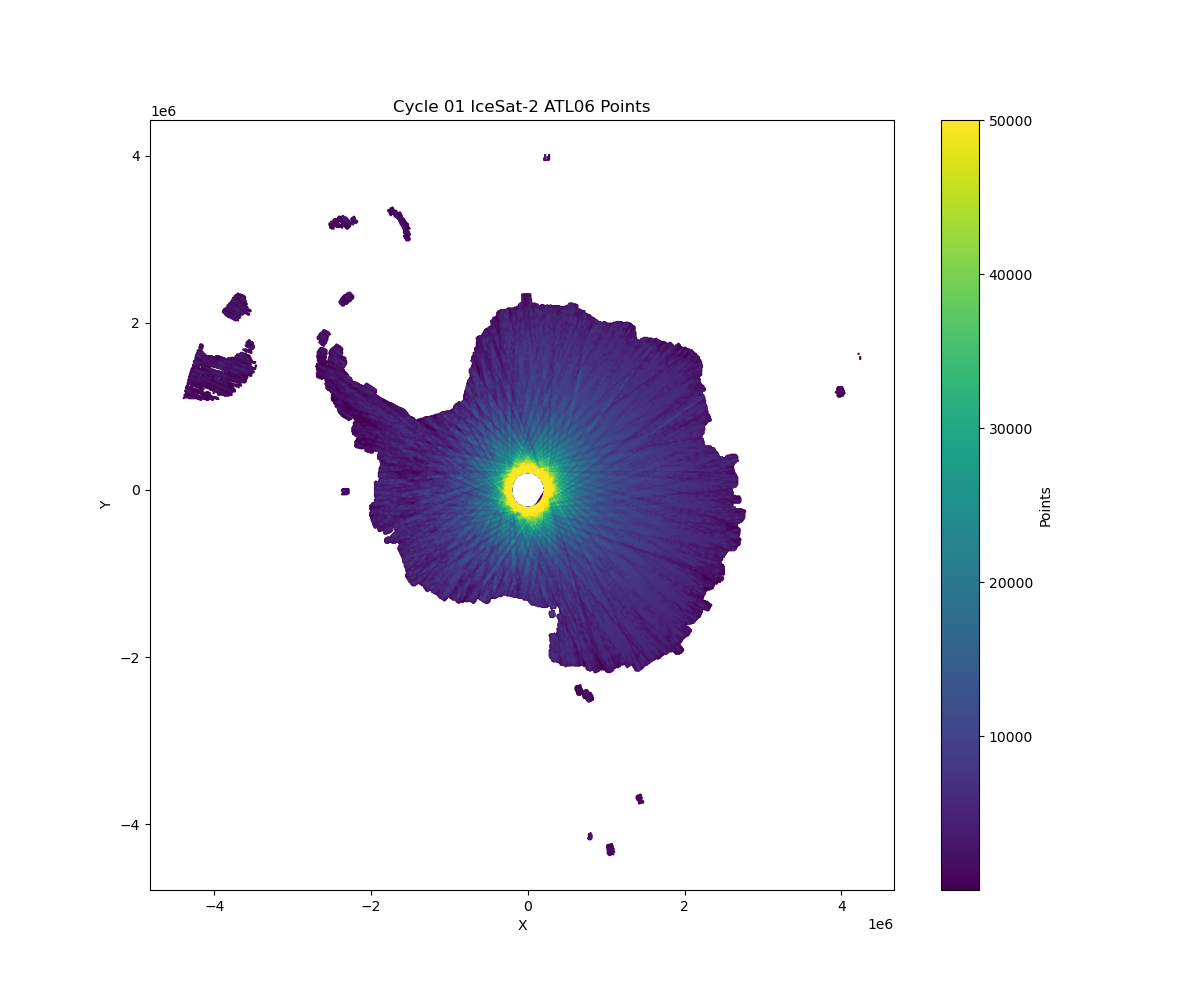

In [21]:
fig1 = plt.figure(figsize=(12,10))
isort = np.argsort(sizes_ant)
plt.scatter(np.array(xs_ant)[isort], np.array(ys_ant)[isort], c=sizes_ant[isort], vmax=50000, cmap='viridis', s=.5)
plt.colorbar(label='Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Cycle {cycle_num} IceSat-2 ATL06 Points")
plt.show()

plt.savefig(f'./Figures/cycle_{cycle_num}_atl06_antarctic_point_numbers.png', dpi=300)

# Arctic

In [ ]:
pickle_path = './Data/cycle_01arctic.pickle' # Change pickle path as needed
cycle_num = pickle_path[8:10]

with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

In [ ]:
xs_arc = []
ys_arc = []
sizes_arc = []

for n, s in data.items():
    if 'E_' in n:
        part = n.partition('E_')
        xs_arc.append(float(part[0]))
        ys_arc.append(float(part[2][:-1]))
    sizes_arc.append(s)
    
sizes_arc = np.array(sizes_arc)
xs_arc = np.array(xs_arc)
ys_arc = np.array(ys_arc)

sizes_arc = sizes_arc.astype('f')
sizes_arc[sizes_arc == 0] = np.nan

In [ ]:
fig1 = plt.figure(figsize=(12,10))
isort = np.argsort(sizes_arc)
plt.scatter(np.array(xs_arc)[isort], np.array(ys_arc)[isort], c=sizes_arc[isort], vmax=50000, cmap='viridis', s=.5)
plt.colorbar(label='Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Cycle {cycle_num} IceSat-2 Points")
plt.show()

plt.savefig(f'./Figures/cycle_{cycle_num}_arctic_point_numbers.png', dpi=300)